# NLP over Amazon Videogames Review - PUCP

## Integrantes del grupo: 

* Arian Gallardo - 20153227
* Luis Carranza - 20151110
* Patricio Avila - 20151191

Regarding dataset:

This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).

In [223]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import json
from collections import Counter

<b>Lectura de datos:</b>

In [10]:
df = pd.read_json("./corpus/reviews_videogames.json", lines = True)
df.head()

asin  helpful  overall  \
0  0700099867  [8, 12]        1   
1  0700099867   [0, 0]        4   
2  0700099867   [0, 0]        1   
3  0700099867  [7, 10]        3   
4  0700099867   [2, 2]        4   

                                          reviewText   reviewTime  \
0  Installing the game was a struggle (because of...   07 9, 2012   
1  If you like rally cars get this game you will ...  06 30, 2013   
2  1st shipment received a book instead of the ga...  06 28, 2014   
3  I got this version instead of the PS3 version,...  09 14, 2011   
4  I had Dirt 2 on Xbox 360 and it was an okay ga...  06 14, 2011   

       reviewerID                        reviewerName  \
0  A2HD75EMZR8QLN                                 123   
1  A3UR8NLLY1ZHCX  Alejandro Henao "Electronic Junky"   
2  A1INA0F5CWW3J4          Amazon Shopper "Mr.Repsol"   
3  A1DLMTOTHQ4AST                            ampgreen   
4  A361M14PU2GUEG        Angry Ryan "Ryan A. Forrest"   

                                           summary  unixReviewTime  
0         Pay to unlock content? I don't think so.      1341792000  
1                                  Good rally game      1372550400  
2                                        Wrong key      1403913600  
3  awesome game, if it did not crash frequently !!      1315958400  
4                                           DIRT 3      1308009600

<b>Probamos una cantidad reducida de datos:</b>

In [30]:
df = df.head(1000)

<b>Separamos los reviews de los labels:</b>

In [144]:
reviews = np.array(df["reviewText"])
labels = np.array(df["overall"])

In [33]:
labels

array([1, 4, 1, 3, 4, 4, 5, 1, 4, 2, 5, 5, 5, 1, 1, 1, 4, 3, 1, 1, 5, 1,
       2, 3, 5, 4, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 1, 4, 5, 4, 5, 5, 1,
       5, 5, 2, 2, 3, 4, 4, 1, 5, 2, 4, 5, 5, 3, 5, 3, 5, 5, 5, 4, 5, 5,
       5, 5, 5, 4, 4, 3, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       1, 4, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 4, 3, 5,
       3, 2, 5, 5, 5, 5, 5, 5, 5, 5, 1, 4, 3, 4, 4, 5, 3, 5, 4, 5, 2, 4,
       1, 5, 4, 5, 3, 5, 4, 4, 5, 5, 2, 5, 4, 3, 5, 4, 5, 5, 5, 5, 4, 4,
       3, 5, 4, 4, 5, 5, 5, 5, 4, 4, 2, 4, 2, 5, 4, 2, 1, 5, 3, 1, 1, 4,
       5, 4, 4, 4, 3, 4, 4, 4, 2, 4, 5, 5, 5, 5, 5, 5, 3, 5, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 3, 4, 4, 4, 3, 2, 5, 5,
       4, 5, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 2, 5, 4, 5, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 5, 1,
       4, 2, 5, 1, 5, 5, 4, 4, 5, 5, 1, 4, 5, 4, 5, 1, 5, 1, 2, 3, 5, 4,
       5, 5, 4, 4, 3, 5, 5, 5, 4, 5, 5, 5, 3, 5, 5,

<b>Importamos stopwords del ingles para quitarlos del corpus, por su irrelevancia en nuestro analisis:<b>

In [142]:
import nltk
nltk.download('stopwords')
stopwords_eng = np.array(nltk.corpus.stopwords.words('english'))
stopwords_eng

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ariangc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [145]:
reviews

array(['Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don\'t like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I\'m really tired of arcade style rally/racing games anyway.I\'ll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.',
       "If you like rally cars get this game you will have fun.It is more oriented to &#34;European market&#34; since here in America there isn't a huge rally fan party. Music it is very European and even th

In [202]:
lst = " ".join(reviews).split()
ctr = Counter(lst)
v_size = len(ctr)
ntok = len(lst)
print("The size of the vocabulary is: {}".format(v_size))
print("The number of total tokens is: {}".format(ntok))

The size of the vocabulary is: 22084
The number of total tokens is: 174769


## Limpieza de datos

### 1) Convertimos todos los reviews a minuscula

In [188]:
reviews_lower = np.array([t.lower() for t in reviews])
reviews_lower

array(['installing the game was a struggle (because of games for windows live bugs).some championship races and cars can only be "unlocked" by buying them as an addon to the game. i paid nearly 30 dollars when the game was new. i don\'t like the idea that i have to keep paying to keep playing.i noticed no improvement in the physics or graphics compared to dirt 2.i tossed it in the garbage and vowed never to buy another codemasters game. i\'m really tired of arcade style rally/racing games anyway.i\'ll continue to get my fix from richard burns rally, and you should to. :)http://www.amazon.com/richard-burns-rally-pc/dp/b000c97156/ref=sr_1_1?ie=utf8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallythank you for reading my review! if you enjoyed it, be sure to rate it as helpful.',
       "if you like rally cars get this game you will have fun.it is more oriented to &#34;european market&#34; since here in america there isn't a huge rally fan party. music it is very european and even th

In [203]:
lst = " ".join(reviews_lower).split()
ctr = Counter(lst)
v_size = len(ctr)
ntok = len(lst)
print("The size of the vocabulary is: {}".format(v_size))
print("The number of total tokens is: {}".format(ntok))

The size of the vocabulary is: 19912
The number of total tokens is: 174769


### 2) Quitamos los stopwords del corpus:

In [189]:
reviews_no_stopwords = np.array([" ".join([token for token in t.split() if token not in stopwords_eng]) for t in reviews_lower])
reviews_no_stopwords

array(['installing game struggle (because games windows live bugs).some championship races cars "unlocked" buying addon game. paid nearly 30 dollars game new. like idea keep paying keep playing.i noticed improvement physics graphics compared dirt 2.i tossed garbage vowed never buy another codemasters game. i\'m really tired arcade style rally/racing games anyway.i\'ll continue get fix richard burns rally, to. :)http://www.amazon.com/richard-burns-rally-pc/dp/b000c97156/ref=sr_1_1?ie=utf8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallythank reading review! enjoyed it, sure rate helpful.',
       'like rally cars get game fun.it oriented &#34;european market&#34; since america huge rally fan party. music european even voices game &#34;english&#34; accent.the multiplayer best works ok.',
       '1st shipment received book instead game.2nd shipment got fake one. game arrived wrong key inside sealed box. got contact codemasters send pictures dvd content. said nothing fake dvd.returned

In [204]:
lst = " ".join(reviews_no_stopwords).split()
ctr = Counter(lst)
v_size = len(ctr)
ntok = len(lst)
print("The size of the vocabulary is: {}".format(v_size))
print("The number of total tokens is: {}".format(ntok))

The size of the vocabulary is: 19766
The number of total tokens is: 93851


### 3) Se quitan los enlaces web de los corpus, puesto que se tratan solo de direcciones web sin tokens importantes

In [190]:
reviews_no_links = np.array([re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=\W]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=\W]*)\W?", "", t) for t in reviews_no_stopwords])
reviews_no_links

array(['installing game struggle (because games windows live bugs).some championship races cars "unlocked" buying addon game. paid nearly 30 dollars game new. like idea keep paying keep playing.i noticed improvement physics graphics compared dirt 2.i tossed garbage vowed never buy another codemasters game. i\'m really tired arcade style rally/racing games anyway.i\'ll continue get fix richard burns rally, to. :)',
       'like rally cars get game fun.it oriented &#34;european market&#34; since america huge rally fan party. music european even voices game &#34;english&#34; accent.the multiplayer best works ok.',
       '1st shipment received book instead game.2nd shipment got fake one. game arrived wrong key inside sealed box. got contact codemasters send pictures dvd content. said nothing fake dvd.returned good bye.!',
       'got version instead ps3 version, turned mistake. console versions games look 95 percent good pc versions, deal driver issues numerous things go wrong windows. fi

In [205]:
lst = " ".join(reviews_no_links).split()
ctr = Counter(lst)
v_size = len(ctr)
ntok = len(lst)
print("The size of the vocabulary is: {}".format(v_size))
print("The number of total tokens is: {}".format(ntok))

The size of the vocabulary is: 19765
The number of total tokens is: 93844


### 4) Se realiza un ajuste al corpus de tal manera que no se pierdan tokens que no fueron espaciados correctamente

In [191]:
reviews_fixed = np.array([re.sub('(?<=[\W])(?=[a-zA-Z])', ' ', t) for t in reviews_no_links])
reviews_fixed

array(['installing  game  struggle ( because  games  windows  live  bugs). some  championship  races  cars " unlocked"  buying  addon  game.  paid  nearly 30  dollars  game  new.  like  idea  keep  paying  keep  playing. i  noticed  improvement  physics  graphics  compared  dirt 2. i  tossed  garbage  vowed  never  buy  another  codemasters  game.  i\' m  really  tired  arcade  style  rally/ racing  games  anyway. i\' ll  continue  get  fix  richard  burns  rally,  to. :)',
       'like  rally  cars  get  game  fun. it  oriented &#34; european  market&#34;  since  america  huge  rally  fan  party.  music  european  even  voices  game &#34; english&#34;  accent. the  multiplayer  best  works  ok.',
       '1st  shipment  received  book  instead  game.2nd  shipment  got  fake  one.  game  arrived  wrong  key  inside  sealed  box.  got  contact  codemasters  send  pictures  dvd  content.  said  nothing  fake  dvd. returned  good  bye.!',
       'got  version  instead  ps3  version,  turne

In [206]:
lst = " ".join(reviews_fixed).split()
ctr = Counter(lst)
v_size = len(ctr)
ntok = len(lst)
print("The size of the vocabulary is: {}".format(v_size))
print("The number of total tokens is: {}".format(ntok))

The size of the vocabulary is: 18168
The number of total tokens is: 100274


### 5) Quitamos los caracteres especiales

In [193]:
reviews_alphanumeric = np.array([re.sub("[" + string.punctuation + "]", "", t) for t in reviews_no_links])
reviews_alphanumeric

array(['installing game struggle because games windows live bugssome championship races cars unlocked buying addon game paid nearly 30 dollars game new like idea keep paying keep playingi noticed improvement physics graphics compared dirt 2i tossed garbage vowed never buy another codemasters game im really tired arcade style rallyracing games anywayill continue get fix richard burns rally to ',
       'like rally cars get game funit oriented 34european market34 since america huge rally fan party music european even voices game 34english34 accentthe multiplayer best works ok',
       '1st shipment received book instead game2nd shipment got fake one game arrived wrong key inside sealed box got contact codemasters send pictures dvd content said nothing fake dvdreturned good bye',
       'got version instead ps3 version turned mistake console versions games look 95 percent good pc versions deal driver issues numerous things go wrong windows first installation takes 30 minutes ridiculous ne

In [197]:
lst = " ".join(reviews_alphanumeric).split()
ctr = Counter(lst)
v_size = len(ctr)
ntok = len(lst)
print("The size of the vocabulary is: {}".format(v_size))
print("The number of total tokens is: {}".format(ntok))

The size of the vocabulary is: 13364
The number of total tokens is: 93501


### Análisis visual de los tokens en el corpus

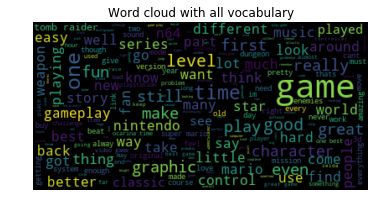

In [201]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=40).generate(" ".join(reviews_alphanumeric))

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud with all vocabulary")
plt.show()

## Clasificación con vector TF-IDF

In [209]:
def clean_tokens(text):
    text_lower = text.lower()
    text_no_stopwords = " ".join([token for token in text_lower.split() if token not in stopwords_eng])
    text_no_links = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=\W]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=\W]*)\W?", "", text_no_stopwords)
    text_fixed = re.sub('(?<=[\W])(?=[a-zA-Z])', ' ', text_no_links)
    text_alphanumeric = re.sub("[" + string.punctuation + "]", "", text_fixed)
    return text_alphanumeric.split()

In [211]:
clean_tokens(reviews[2])

['1st',
 'shipment',
 'received',
 'book',
 'instead',
 'game2nd',
 'shipment',
 'got',
 'fake',
 'one',
 'game',
 'arrived',
 'wrong',
 'key',
 'inside',
 'sealed',
 'box',
 'got',
 'contact',
 'codemasters',
 'send',
 'pictures',
 'dvd',
 'content',
 'said',
 'nothing',
 'fake',
 'dvd',
 'returned',
 'good',
 'bye']

In [212]:
label2index = {}
for i, label in enumerate(list(set([x for x in labels]))):
    label2index[label] = i
    
y = np.array([label2index[x] for x in labels])
y.shape

(1000,)

In [214]:
set(y)

{0, 1, 2, 3, 4}

In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [218]:
def run_model(clf, X, y):
    scores = cross_val_score(clf, X, y, cv=5)
    print("%s accuracy: %0.2f (+/- %0.2f)" % \
          (str(clf.__class__).split('.')[-1].replace('>','').replace("'",''), 
          scores.mean(), scores.std() * 2))

In [219]:
def run_models(X, y):
    run_model(LinearSVC(), X, y)
    run_model(SGDClassifier(), X, y)
    run_model(Perceptron(), X, y)
    run_model(PassiveAggressiveClassifier(), X, y)
    run_model(BernoulliNB(), X, y)
    run_model(MultinomialNB(), X, y)
    run_model(KNeighborsClassifier(), X, y)
    run_model(NearestCentroid(), X, y)
    run_model(RandomForestClassifier(n_estimators=100, max_depth=10), X, y)

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_1 = TfidfVectorizer(tokenizer=clean_tokens, stop_words='english').fit_transform(reviews)

In [216]:
X_1.shape

(1000, 10569)

In [220]:
print(X_1.shape,y.shape)

(1000, 10569) (1000,)


In [224]:
run_models(X_1, y)

LinearSVC accuracy: 0.62 (+/- 0.08)
SGDClassifier accuracy: 0.59 (+/- 0.13)
Perceptron accuracy: 0.55 (+/- 0.13)
PassiveAggressiveClassifier accuracy: 0.57 (+/- 0.13)
BernoulliNB accuracy: 0.61 (+/- 0.06)
MultinomialNB accuracy: 0.65 (+/- 0.01)
KNeighborsClassifier accuracy: 0.53 (+/- 0.05)
NearestCentroid accuracy: 0.51 (+/- 0.21)
RandomForestClassifier accuracy: 0.65 (+/- 0.01)


## Clasificacion con vector CBOW

In [240]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(reviews_alphanumeric).todense()

In [242]:
print(X_bow.shape,y.shape)

(1000, 13332) (1000,)


In [241]:
run_models(X_bow, y)

LinearSVC accuracy: 0.56 (+/- 0.10)
SGDClassifier accuracy: 0.54 (+/- 0.18)
Perceptron accuracy: 0.54 (+/- 0.13)
PassiveAggressiveClassifier accuracy: 0.57 (+/- 0.10)
BernoulliNB accuracy: 0.61 (+/- 0.06)
MultinomialNB accuracy: 0.60 (+/- 0.08)
KNeighborsClassifier accuracy: 0.63 (+/- 0.02)
NearestCentroid accuracy: 0.36 (+/- 0.24)
RandomForestClassifier accuracy: 0.65 (+/- 0.01)


## Clasificación con vector spacy

In [244]:
import spacy

nlp = spacy.load('en_core_web_lg')

OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.